In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Performing Data analysis on these companies (googel, amazon, apple, microsoft)

In [2]:
path = r'H:\data analysis\Project\Project 2\individual_stocks_5yr'
company_list = ['AAPL_data.csv', 'GOOG_data.csv', 'MSFT_data.csv', 'AMZN_data.csv']
all_data = pd.DataFrame()
for file in company_list:
    current_df = pd.read_csv(path+'/'+file)
    all_data = pd.concat([all_data,current_df])
all_data.shape

(4752, 7)

In [3]:
all_data.head()

date     open     high      low    close     volume  Name
0  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL
1  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL
2  2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL
3  2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL
4  2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL

**=>Analyze the closing price of all the stocks**

In [4]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4752 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    4752 non-null   object 
 1   open    4752 non-null   float64
 2   high    4752 non-null   float64
 3   low     4752 non-null   float64
 4   close   4752 non-null   float64
 5   volume  4752 non-null   int64  
 6   Name    4752 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 297.0+ KB


In [5]:
all_data['date'] = pd.to_datetime(all_data['date'])

In [6]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4752 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4752 non-null   datetime64[ns]
 1   open    4752 non-null   float64       
 2   high    4752 non-null   float64       
 3   low     4752 non-null   float64       
 4   close   4752 non-null   float64       
 5   volume  4752 non-null   int64         
 6   Name    4752 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 297.0+ KB


In [7]:
tech_list = all_data['Name'].unique()

In [8]:
tech_list

array(['AAPL', 'GOOG', 'MSFT', 'AMZN'], dtype=object)

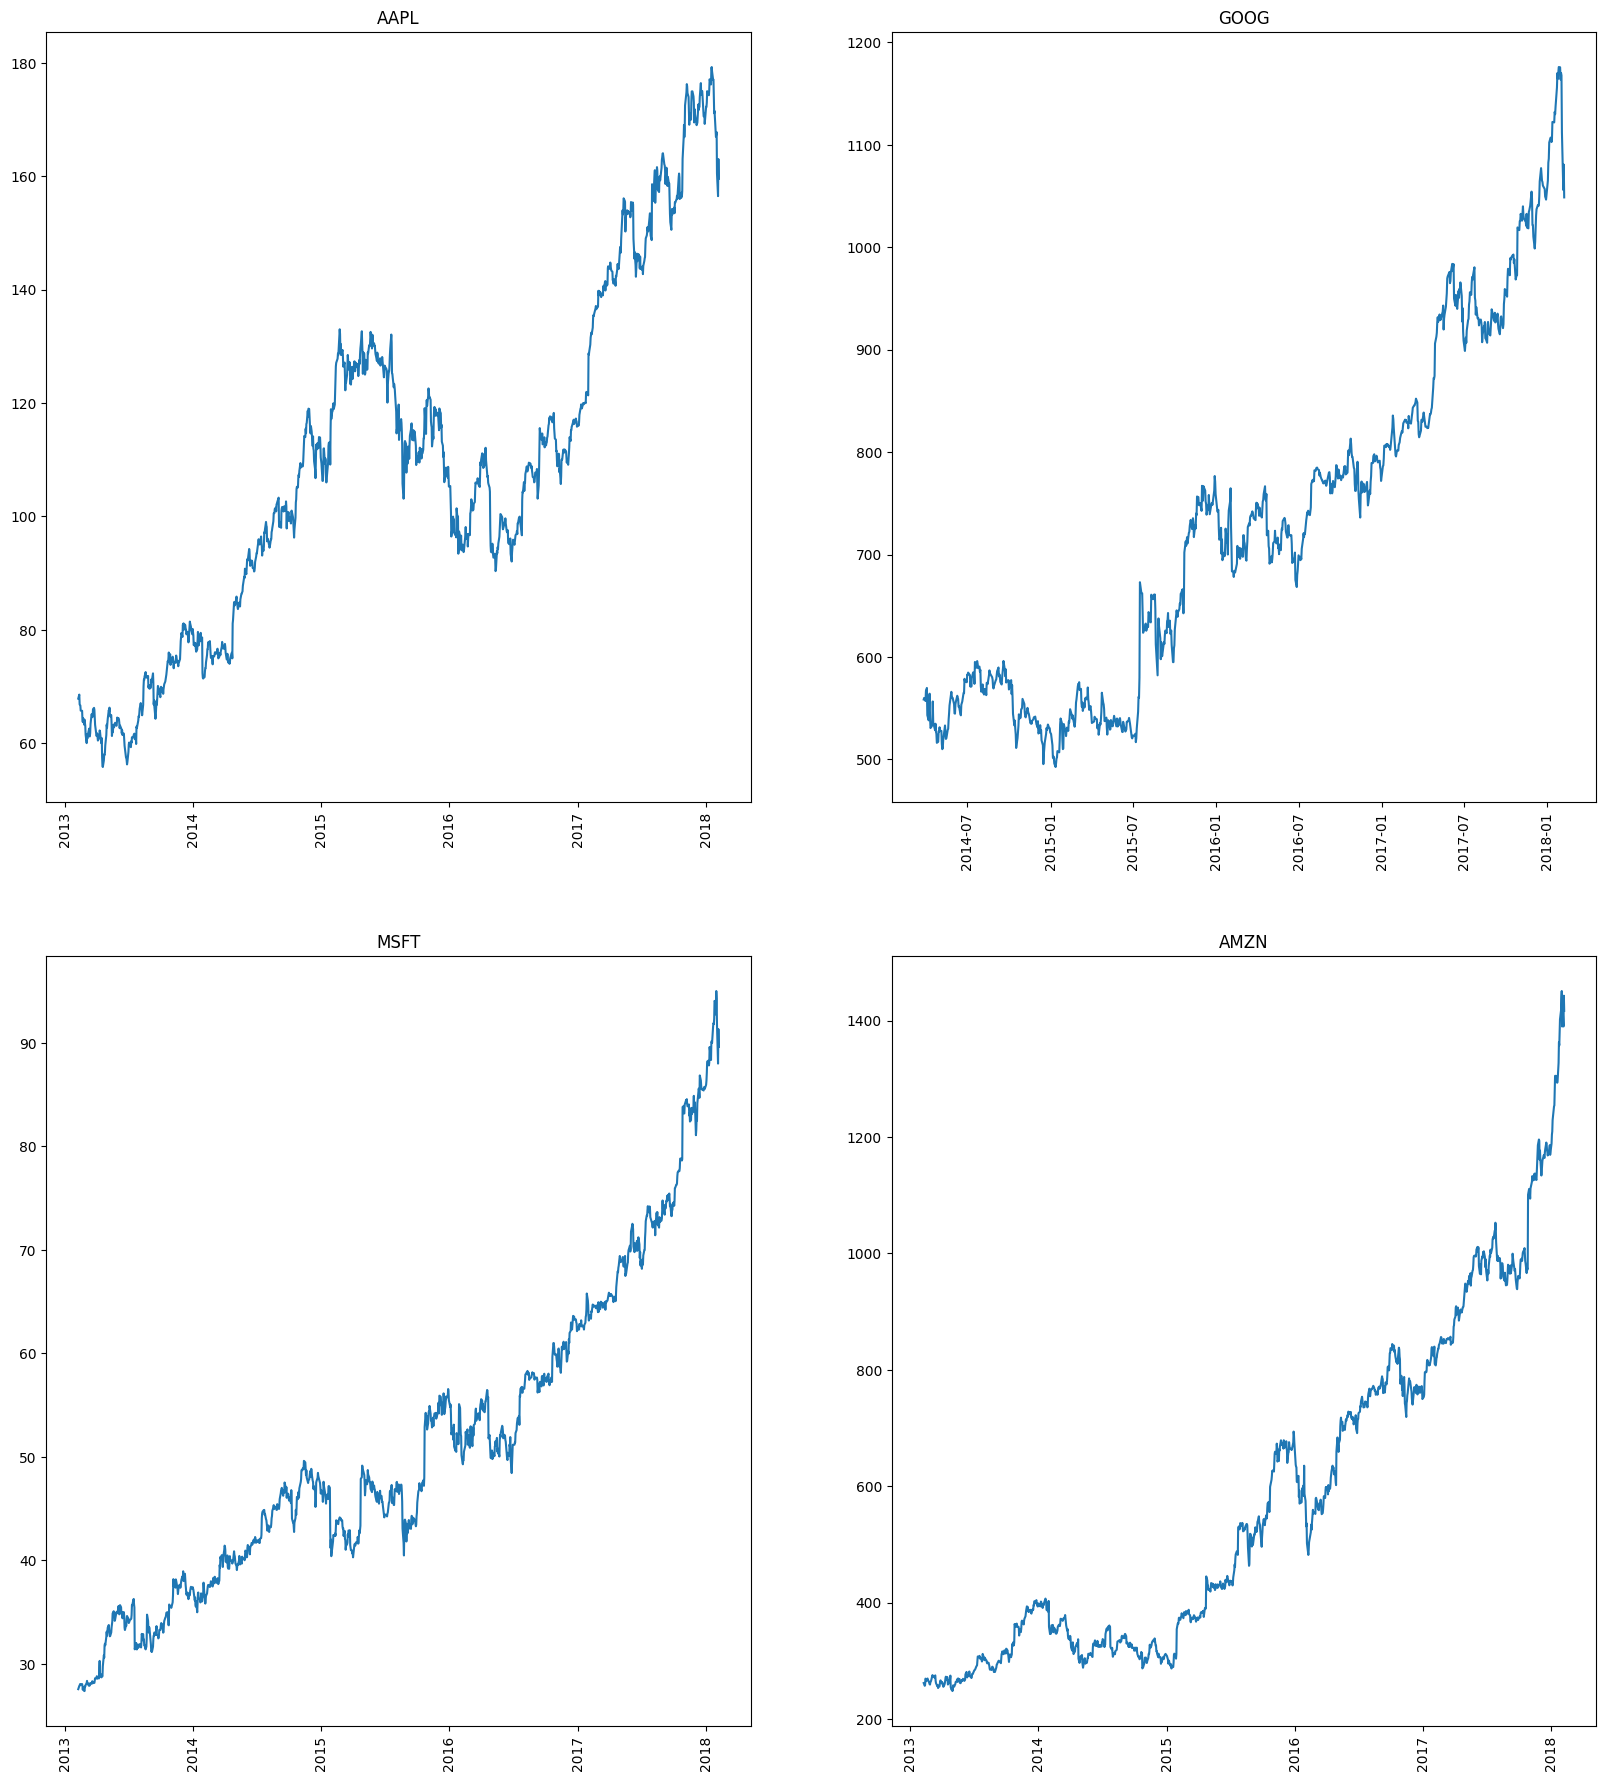

In [9]:
plt.figure(figsize=(20, 22))
for i, company in enumerate(tech_list, 1):
    plt.subplot(2, 2, i)
    df = all_data[all_data['Name'] == company]
    plt.plot(df['date'], df['close'])
    plt.xticks(rotation='vertical')
    plt.title(company)
    

**=> Total volume is being traded on each day**

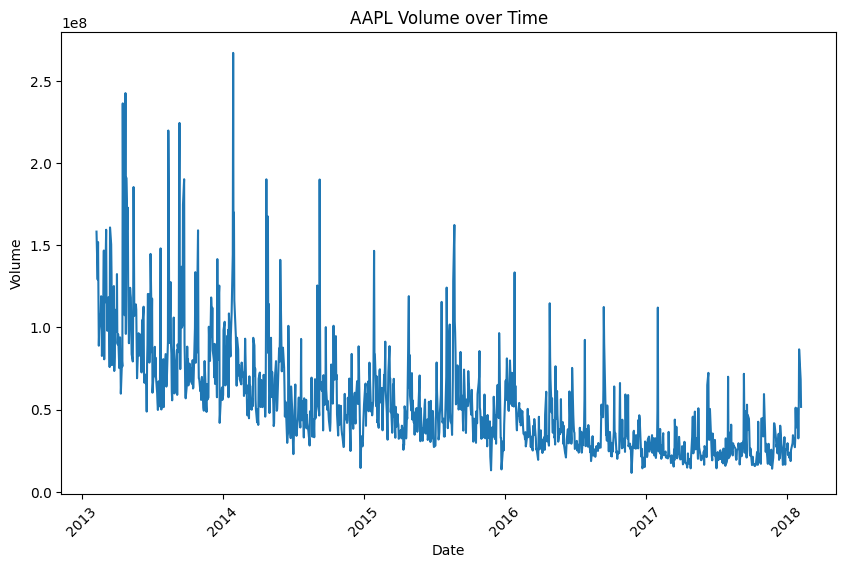

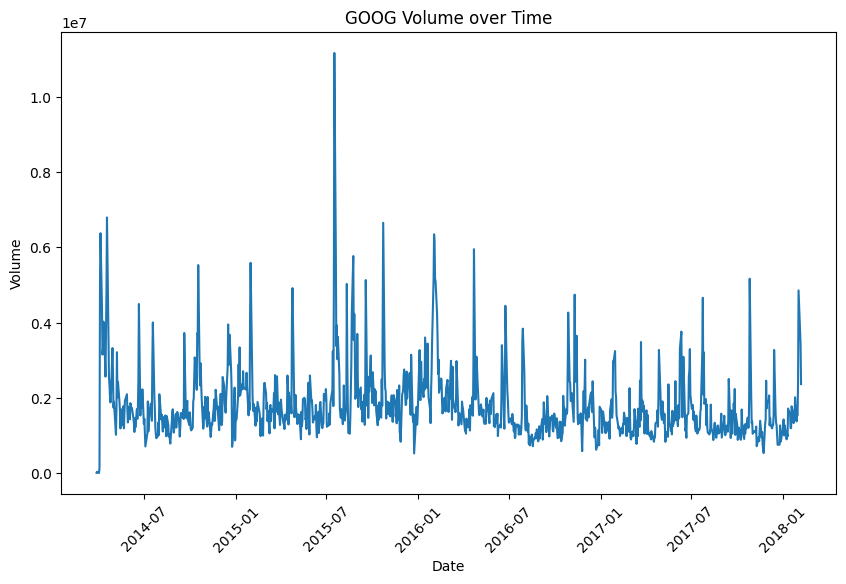

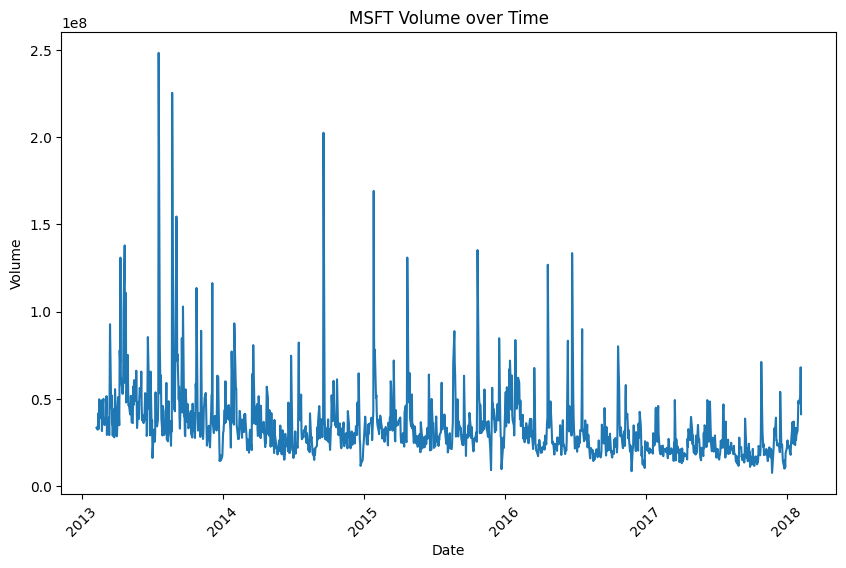

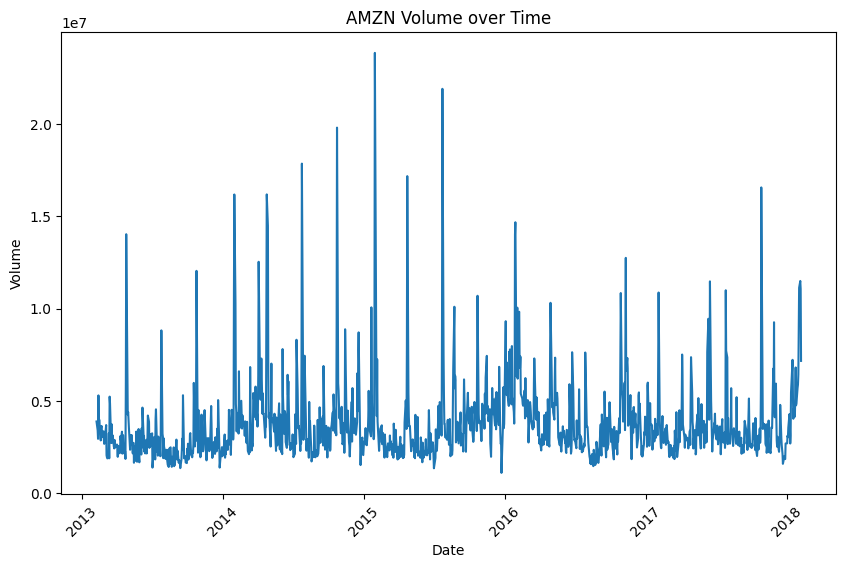

In [10]:
for company in tech_list:
    df = all_data[all_data['Name'] == company]
    plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
    sns.lineplot(data=df, x='date', y='volume')
    plt.title(f'{company} Volume over Time')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()

**=> Analyze the daily price change in the stock**

In [11]:
apple_data = pd.read_csv(path+"/"+'AAPL_data.csv')

In [12]:
apple_data.head()

date     open     high      low    close     volume  Name
0  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL
1  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL
2  2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL
3  2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL
4  2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL

In [13]:
apple_data['daily_price_change'] = apple_data['close'] - apple_data['open']

In [14]:
apple_data.head()

date     open     high      low    close     volume  Name  \
0  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL   
1  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL   
2  2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL   
3  2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL   
4  2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL   

   daily_price_change  
0              0.1400  
1              0.4900  
2             -1.6586  
3             -0.0286  
4              0.2957

In [15]:
apple_data['daily % return'] = (apple_data['daily_price_change']/apple_data['close'])*100

In [16]:
apple_data.head()

date     open     high      low    close     volume  Name  \
0  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL   
1  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL   
2  2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL   
3  2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL   
4  2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL   

   daily_price_change  daily % return  
0              0.1400        0.206325  
1              0.4900        0.714688  
2             -1.6586       -2.481344  
3             -0.0286       -0.042869  
4              0.2957        0.443624

In [17]:
import plotly.express as px

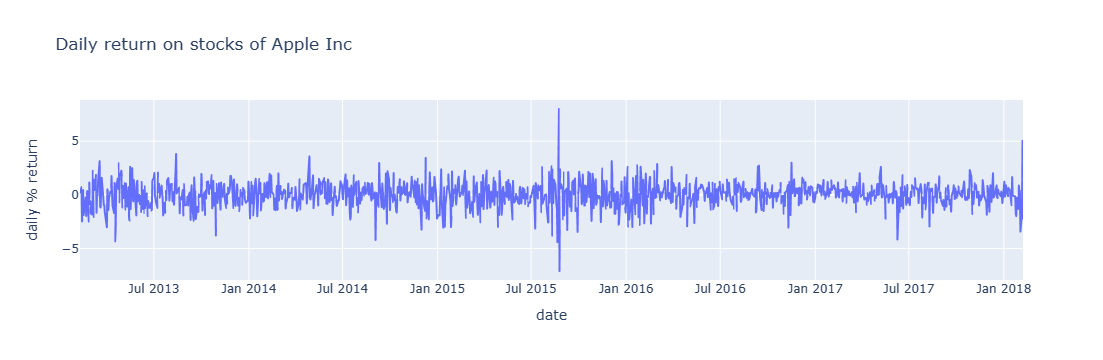

In [18]:
fig = px.line(apple_data, x='date', y='daily % return', title='Daily return on stocks of Apple Inc')
fig.show()

**=> MONTHLY MEAN OF CLOSE FEATURE**

In [19]:
df = apple_data.copy()

In [20]:
df.dtypes

date                   object
open                  float64
high                  float64
low                   float64
close                 float64
volume                  int64
Name                   object
daily_price_change    float64
daily % return        float64
dtype: object

In [21]:
#change the date type
df['date'] = pd.to_datetime(df['date'])

In [22]:
df.dtypes

date                  datetime64[ns]
open                         float64
high                         float64
low                          float64
close                        float64
volume                         int64
Name                          object
daily_price_change           float64
daily % return               float64
dtype: object

In [23]:
df.set_index('date', inplace=True)

In [24]:
df.head()

open     high      low    close     volume  Name  \
date                                                              
2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL   
2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL   
2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL   
2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL   
2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL   

            daily_price_change  daily % return  
date                                            
2013-02-08              0.1400        0.206325  
2013-02-11              0.4900        0.714688  
2013-02-12             -1.6586       -2.481344  
2013-02-13             -0.0286       -0.042869  
2013-02-14              0.2957        0.443624

C:\Users\FaNi\AppData\Local\Temp\ipykernel_12048\400799963.py:2: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



<Axes: xlabel='date'>

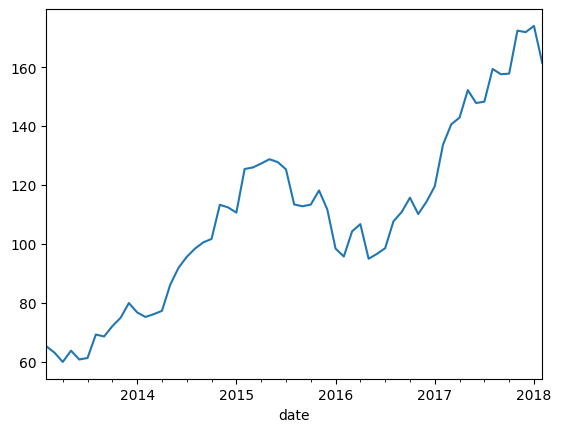

In [25]:
#mothly bases
df['close'].resample('M').mean().plot()

C:\Users\FaNi\AppData\Local\Temp\ipykernel_12048\1239786660.py:1: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.



<Axes: xlabel='date'>

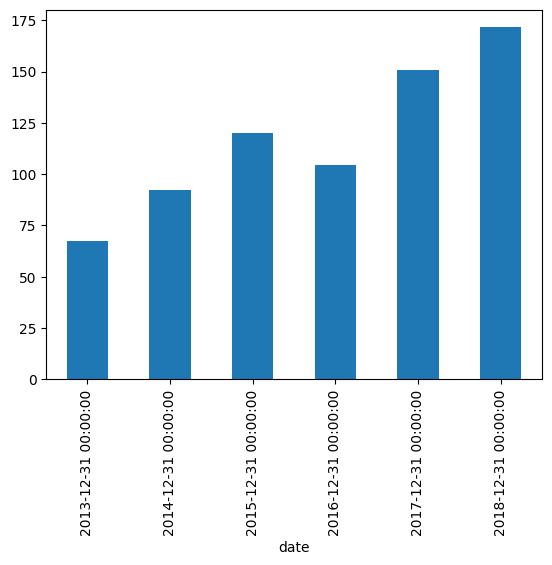

In [26]:
df['close'].resample('Y').mean().plot(kind="bar")

**=> analyze the stock prices are corr to each other or not**

In [27]:
company_list

['AAPL_data.csv', 'GOOG_data.csv', 'MSFT_data.csv', 'AMZN_data.csv']

In [28]:
apple = pd.read_csv(path+'/'+company_list[0])
apple.head()

date     open     high      low    close     volume  Name
0  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL
1  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL
2  2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL
3  2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL
4  2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL

In [29]:
google = pd.read_csv(path+'/'+company_list[1])
google.head()

date     open    high     low   close  volume  Name
0  2014-03-27  568.000  568.00  552.92  558.46   13052  GOOG
1  2014-03-28  561.200  566.43  558.67  559.99   41003  GOOG
2  2014-03-31  566.890  567.00  556.93  556.97   10772  GOOG
3  2014-04-01  558.710  568.45  558.71  567.16    7932  GOOG
4  2014-04-02  565.106  604.83  562.19  567.00  146697  GOOG

In [30]:
microsoft = pd.read_csv(path+'/'+company_list[2])
microsoft.head()

date   open   high    low  close    volume  Name
0  2013-02-08  27.35  27.71  27.31  27.55  33318306  MSFT
1  2013-02-11  27.65  27.92  27.50  27.86  32247549  MSFT
2  2013-02-12  27.88  28.00  27.75  27.88  35990829  MSFT
3  2013-02-13  27.93  28.11  27.88  28.03  41715530  MSFT
4  2013-02-14  27.92  28.06  27.87  28.04  32663174  MSFT

In [31]:
amazon = pd.read_csv(path+'/'+company_list[3])
amazon.head()

date    open    high      low   close   volume  Name
0  2013-02-08  261.40  265.25  260.555  261.95  3879078  AMZN
1  2013-02-11  263.20  263.25  256.600  257.21  3403403  AMZN
2  2013-02-12  259.19  260.16  257.000  258.70  2938660  AMZN
3  2013-02-13  261.53  269.96  260.300  269.47  5292996  AMZN
4  2013-02-14  267.37  270.65  265.400  269.24  3462780  AMZN

In [32]:
close = pd.DataFrame()

In [33]:
close['apple'] = apple['close']
close['google'] = google['close']
close['amazon'] = amazon['close']
close['microsoft'] = microsoft['close']

In [34]:
close.head()

apple  google  amazon  microsoft
0  67.8542  558.46  261.95      27.55
1  68.5614  559.99  257.21      27.86
2  66.8428  556.97  258.70      27.88
3  66.7156  567.16  269.47      28.03
4  66.6556  567.00  269.24      28.04

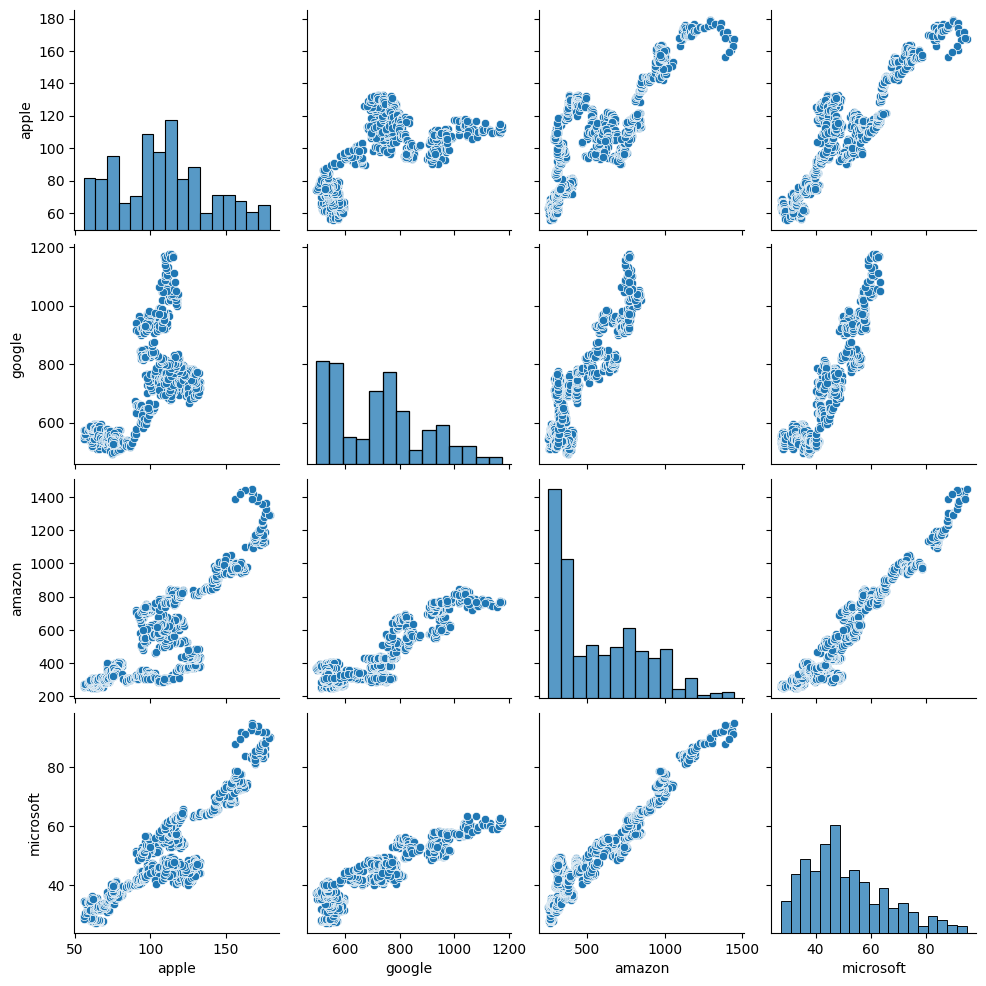

In [35]:
sns.pairplot(data=close)

<Axes: >

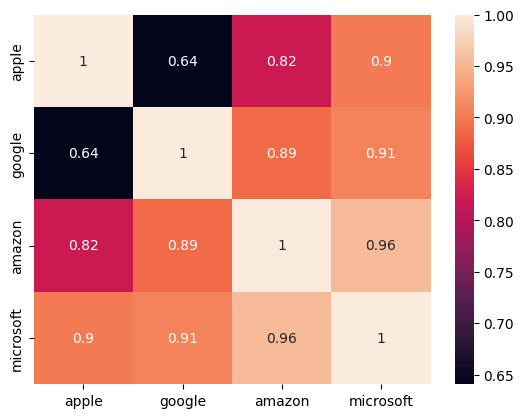

In [37]:
sns.heatmap(close.corr(), annot=True)

**=> Analyze daily stock price and how they are corr to each other**

In [38]:
data = pd.DataFrame()

In [39]:
data['apple_change'] = ((apple['close']-apple['open'])/apple['close'])*100
data['google_change'] = ((google['close']-google['open'])/google['close'])*100
data['amazon_change'] = ((amazon['close']-amazon['open'])/amazon['close'])*100
data['microsoft_change'] = ((microsoft['close']-microsoft['open'])/microsoft['close'])*100

In [41]:
# this data frame includes daily stock returns in ratio
data.head()

apple_change  google_change  amazon_change  microsoft_change
0      0.206325      -1.708269       0.209964          0.725953
1      0.714688      -0.216075      -2.328836          0.753769
2     -2.481344      -1.781065      -0.189409          0.000000
3     -0.042869       1.489879       2.946525          0.356761
4      0.443624       0.334039       0.694548          0.427960

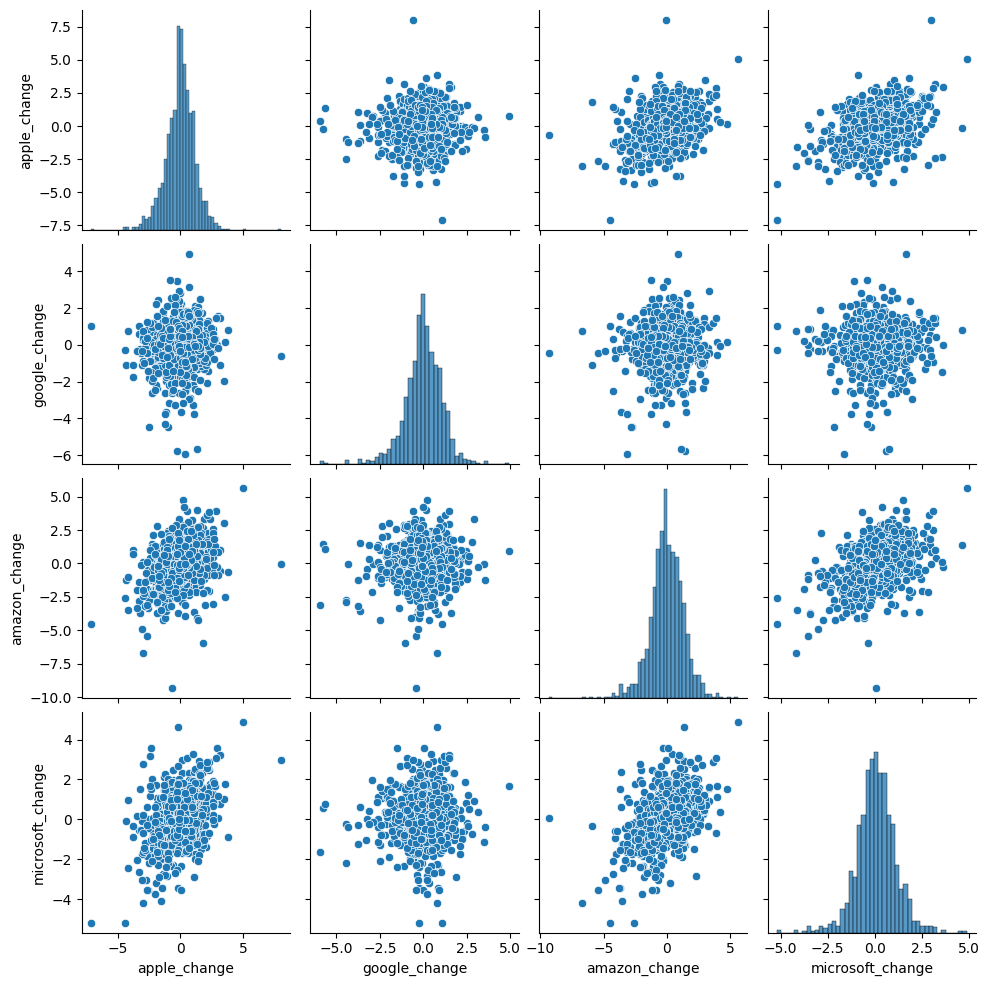

In [42]:
sns.pairplot(data=data)

<Axes: >

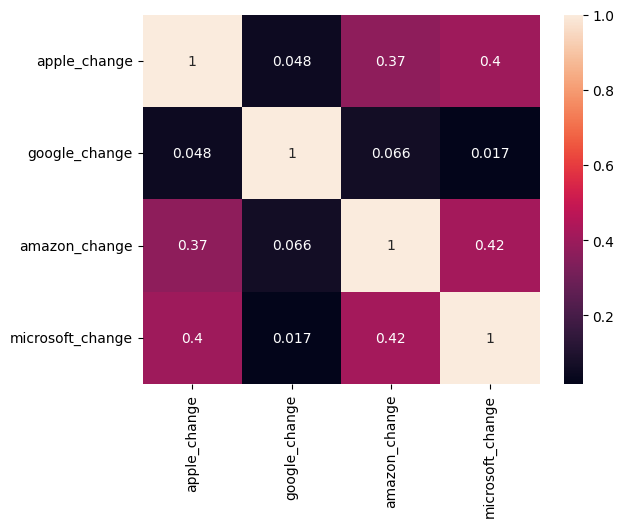

In [43]:
sns.heatmap(data=data.corr(), annot=True)

**=> Value at risk analysis for these companies**

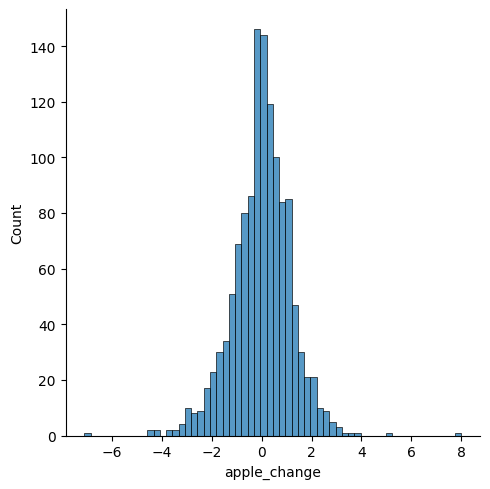

In [44]:
sns.displot(data=data['apple_change'])

In [48]:
data['apple_change'].std()
# 68% of entire data

1.1871377131421237

In [49]:
data['apple_change'].std()*2
# 95% of the entire data

2.3742754262842474

In [50]:
data['apple_change'].std()*3
# 99.7 of the entrie data

3.561413139426371

In [52]:
data['apple_change'].quantile(0.1)
# my daily lose will not exceed from -1.42

-1.4246644227944307

In [53]:
data.describe().T

count      mean       std       min       25%       50%  \
apple_change      1259.0 -0.000215  1.187138 -7.104299 -0.658021  0.042230   
google_change      975.0 -0.012495  1.092560 -5.952266 -0.551963  0.024951   
amazon_change     1259.0 -0.000398  1.358679 -9.363077 -0.738341 -0.002623   
microsoft_change  1259.0  0.076404  1.059260 -5.177618 -0.509241  0.061069   

                       75%       max  
apple_change      0.715427  8.000388  
google_change     0.672649  4.943550  
amazon_change     0.852568  5.640265  
microsoft_change  0.703264  4.861491